In [1]:
import os
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sbn 

In [2]:
with ZipFile('playground-series-s4e2.zip') as z:
    with z.open(f'test.csv') as f:
        df_test = pd.read_csv(f,sep=',')

with ZipFile('playground-series-s4e2.zip') as z:
    with z.open(f'train.csv') as f:
        df_train = pd.read_csv(f,sep=',')

with ZipFile('playground-series-s4e2.zip') as z:
    with z.open(f'sample_submission.csv') as f:
        df_submission = pd.read_csv(f,sep=',')

pd.set_option('display.max_columns', 40)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [5]:
df_test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

In [35]:
df_train.iloc[:,1:].describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [36]:
df_test.iloc[:,1:].describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000
mean,23.952740,1.698934,87.384504,2.442898,2.750610,2.032044,0.974532,0.611033
std,5.799814,0.088761,26.111819,0.531606,0.710927,0.611230,0.840361,0.608005
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631662,65.000000,2.000000,3.000000,1.771781,0.001086,0.000000
50%,22.906342,1.700000,83.952968,2.358087,3.000000,2.000000,1.000000,0.552498
75%,26.000000,1.760710,111.157811,3.000000,3.000000,2.552388,1.571865,1.000000
max,61.000000,1.980000,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [3]:
df_train = df_train.drop_duplicates()

### 2. EDA

In [4]:
numerical_columns = df_train.iloc[:,1:].select_dtypes(include=['int64', 'float64']).columns.tolist()
# numerical_columns.remove('id')
# numerical_columns.remove('NObeyesdad')

categorical_columns = df_train.iloc[:,1:].select_dtypes(include=['object']).columns.tolist()


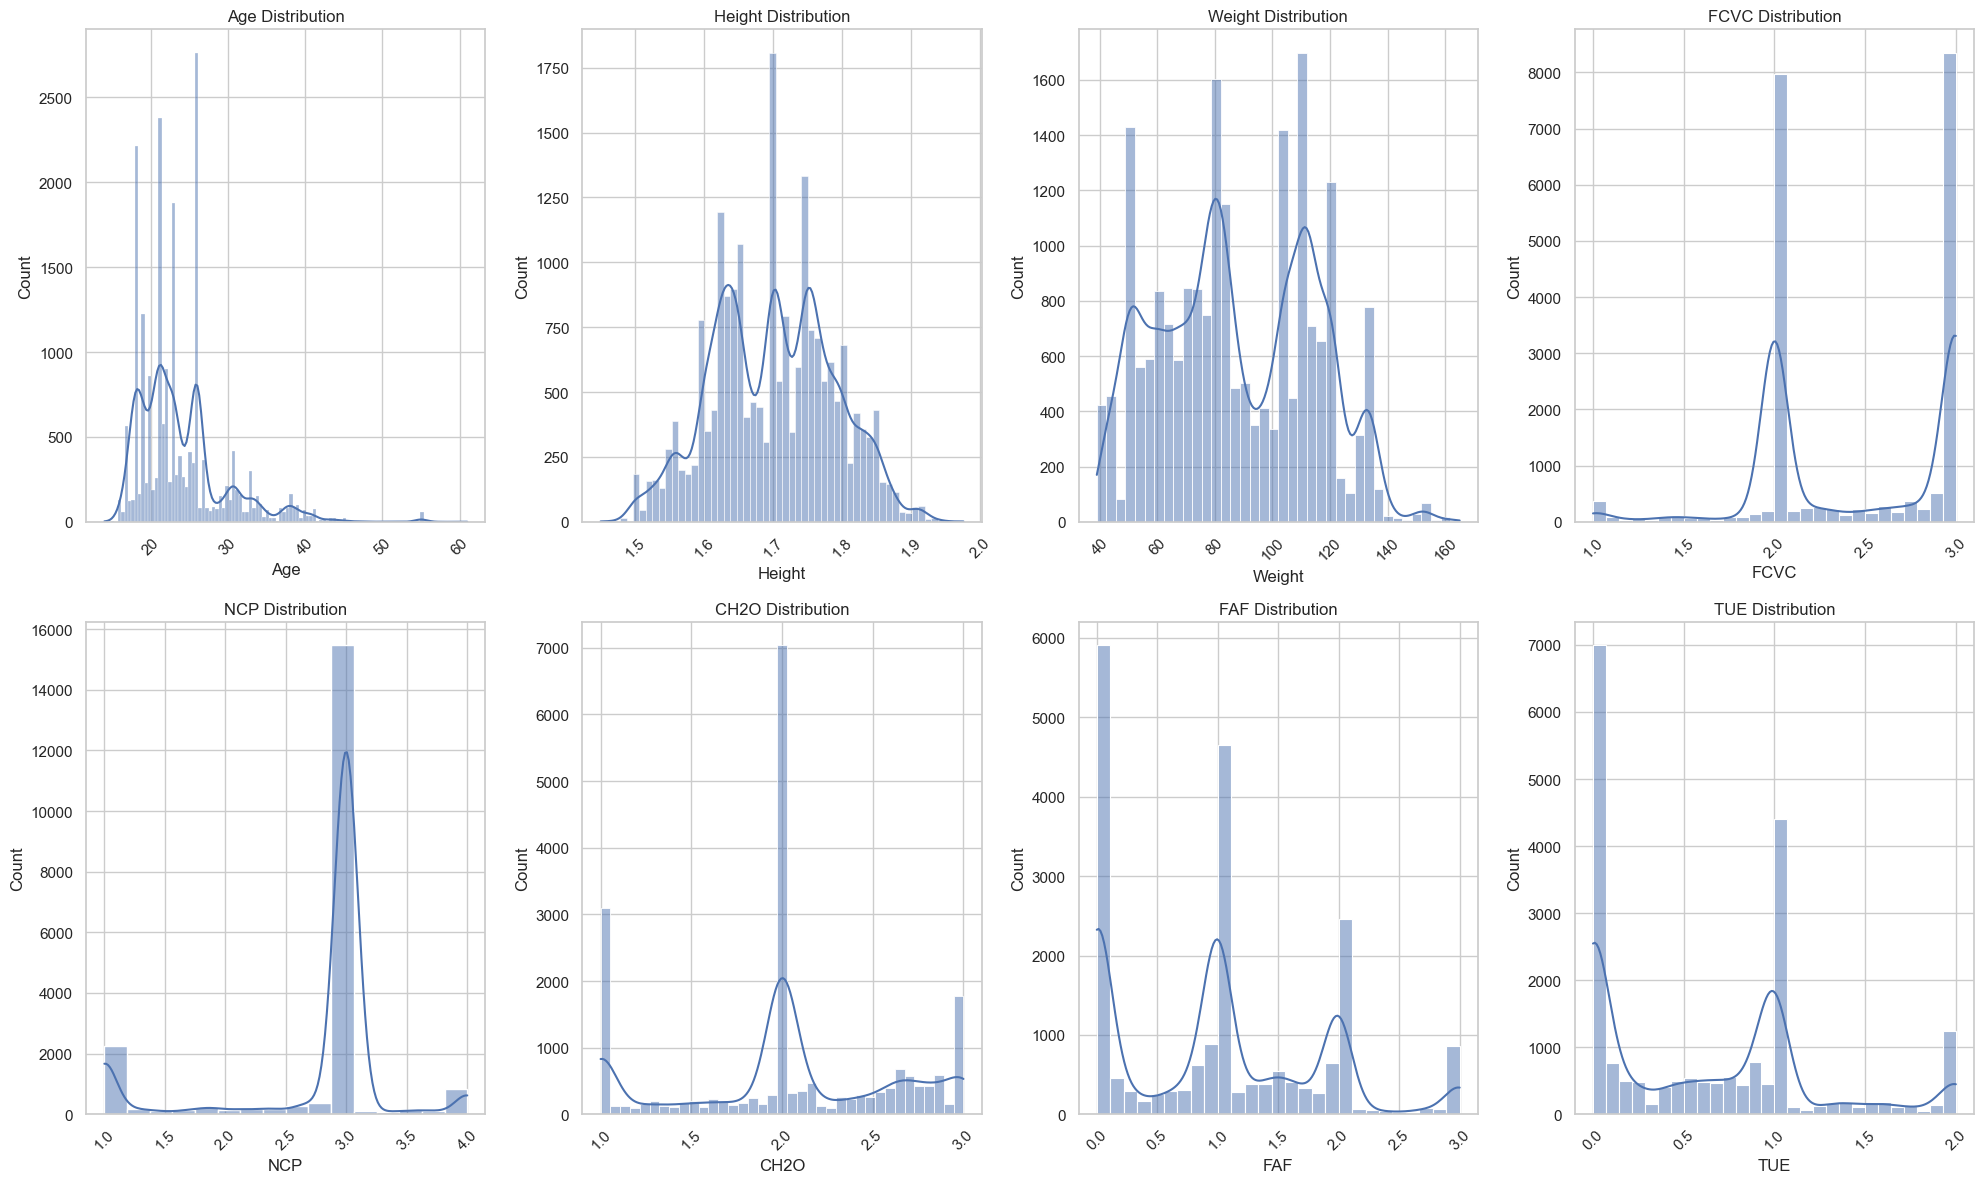

In [5]:
#CATEGORICAL DATA 

num_cols = len(numerical_columns)
num_rows = -(-num_cols // 4) 

sbn.set(style="whitegrid")
plt.figure(figsize=(20, 6 * num_rows))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, 4, i)
    sbn.histplot(df_train[col], kde=True)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

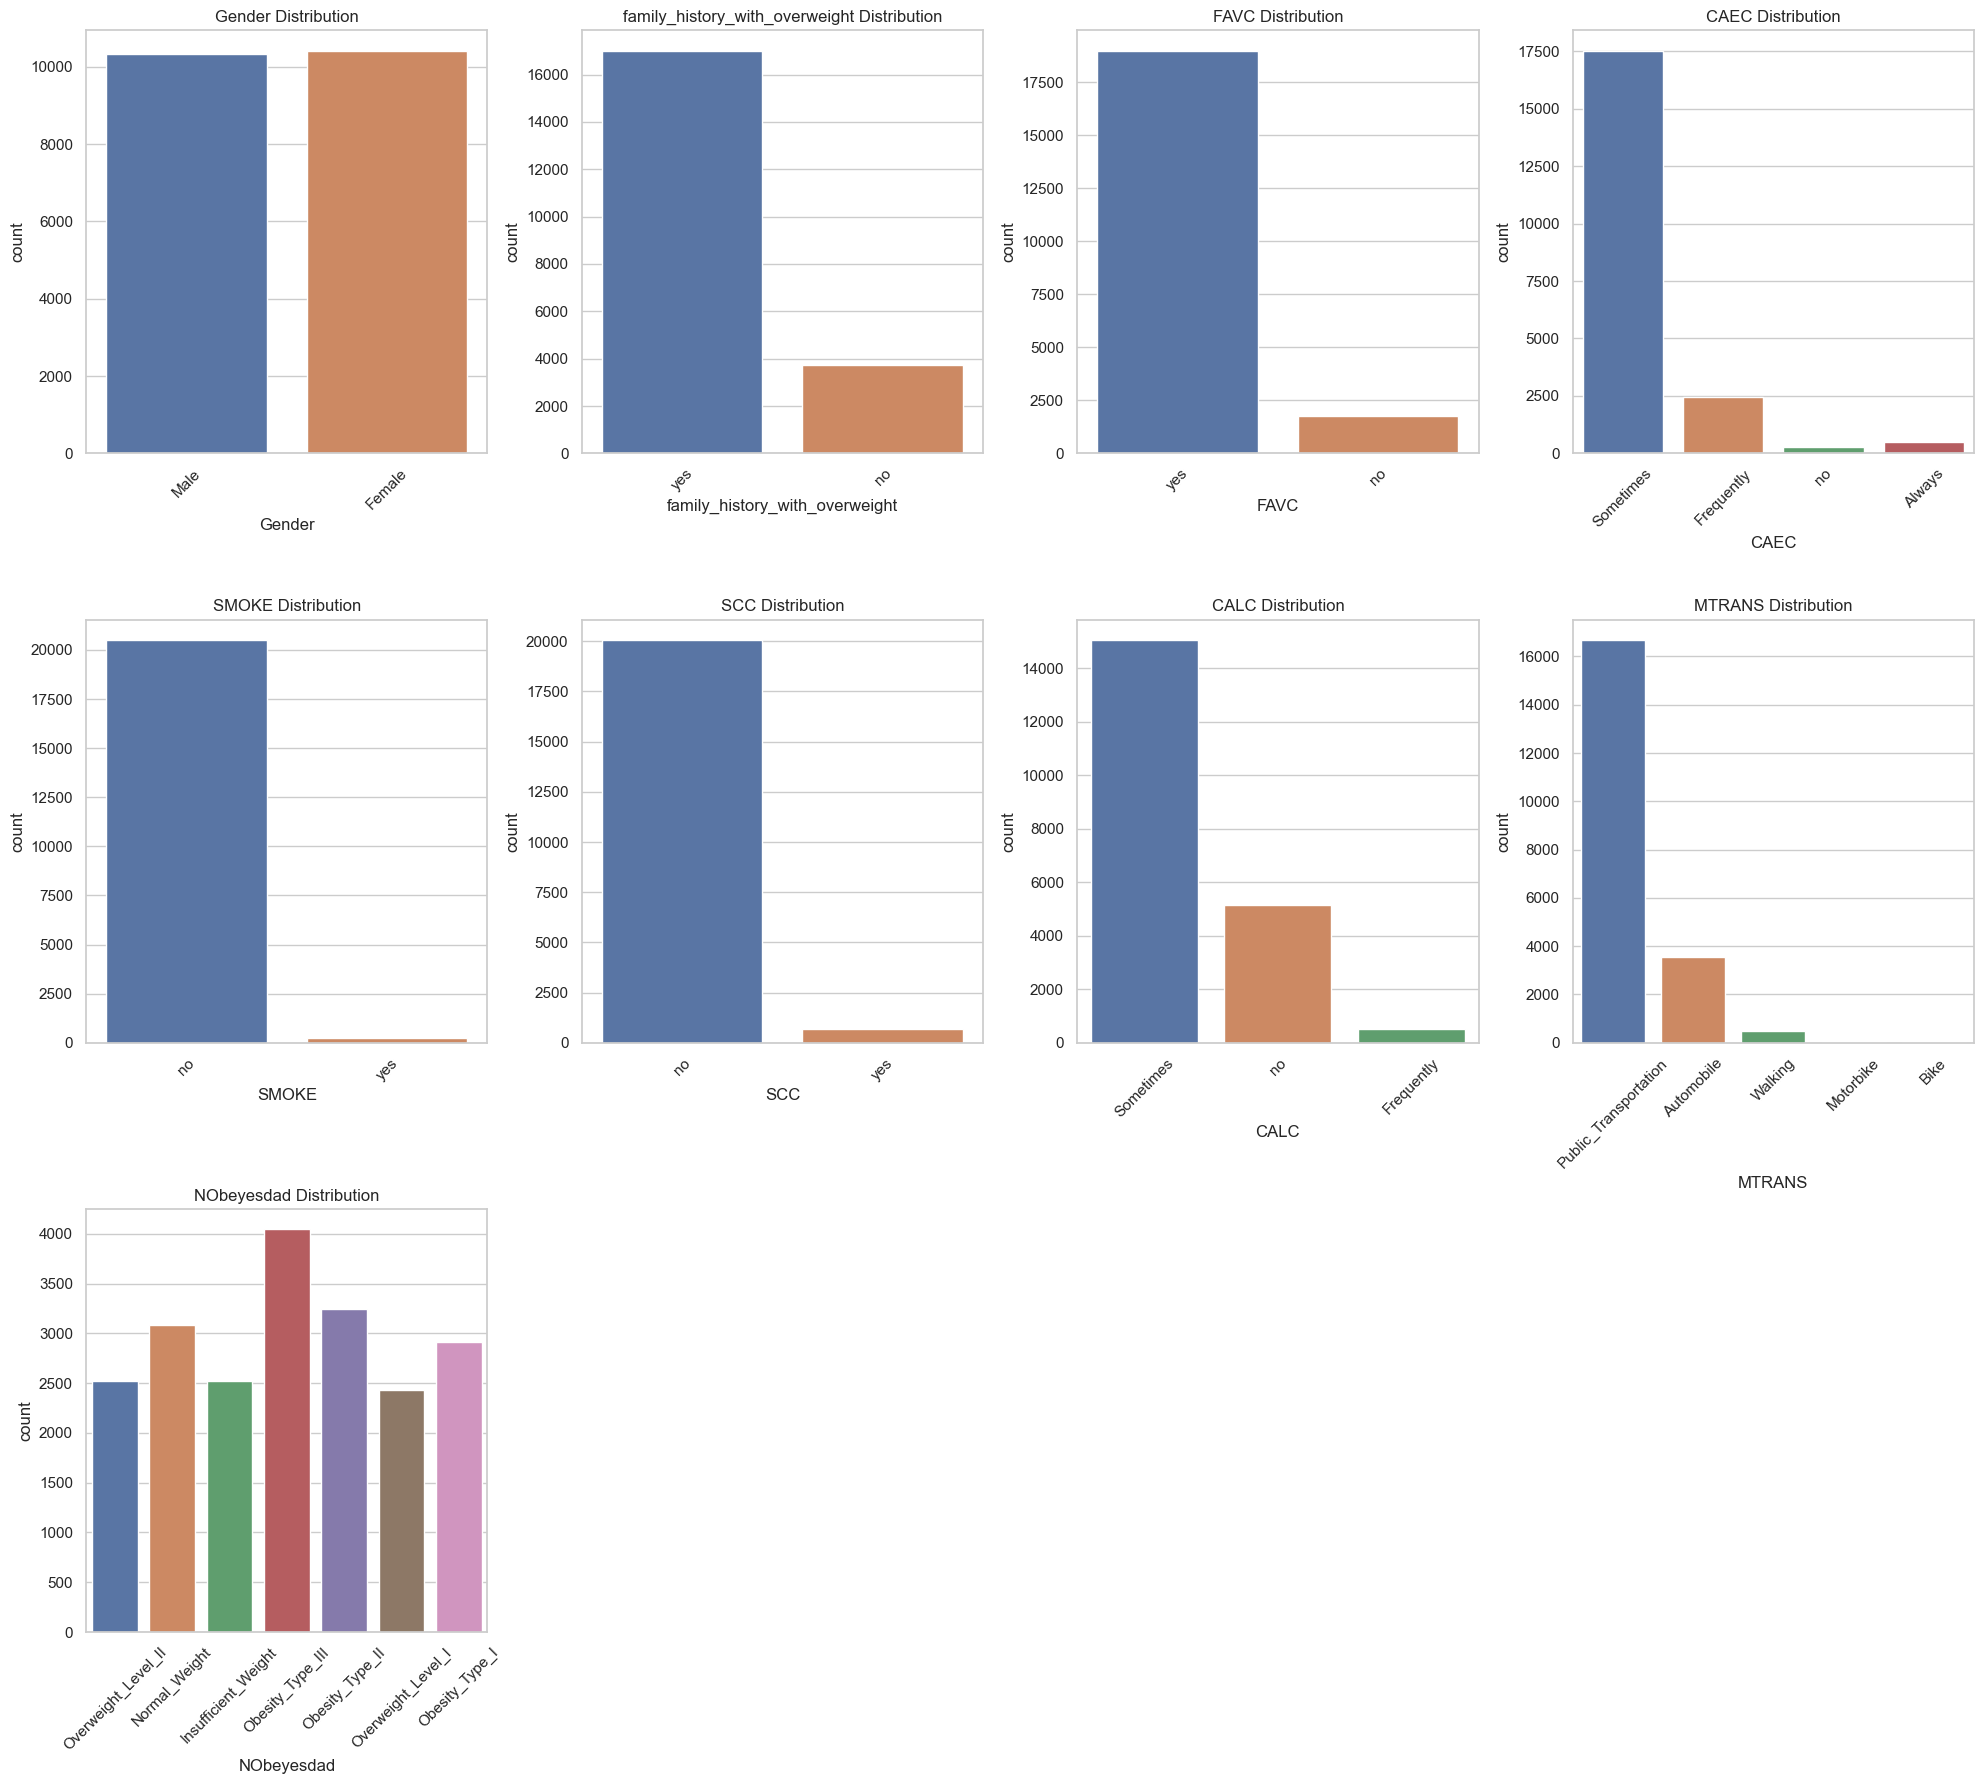

In [6]:
#NUMERICAL DATA 

num_cols = len(categorical_columns)
num_rows = -(-num_cols // 4)

plt.figure(figsize=(20,6 *num_rows))
for i ,col in enumerate(categorical_columns,1):
    plt.subplot(num_rows, 4, i)
    sbn.countplot(x= col, data=df_train)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
py.init_notebook_mode(connected=True)
from pandas_profiling import ProfileReport

C:\Users\wesle\AppData\Local\Temp\ipykernel_1396\1855792965.py:5: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



In [72]:
df_target = df_train.iloc[:,1:].groupby(['NObeyesdad','family_history_with_overweight', 'Gender','Age','Height', 'Weight']).size().sort_values(ascending=False).reset_index(name='quantity')

In [76]:
fig = px.box(df_target, x="family_history_with_overweight", y='Weight' ,color="NObeyesdad")
fig.update_layout(bargap=0.2)
fig.show()

In [77]:
fig = px.box(df_target, x="family_history_with_overweight", y='Height' ,color="NObeyesdad")
fig.update_layout(bargap=0.2)
fig.show()

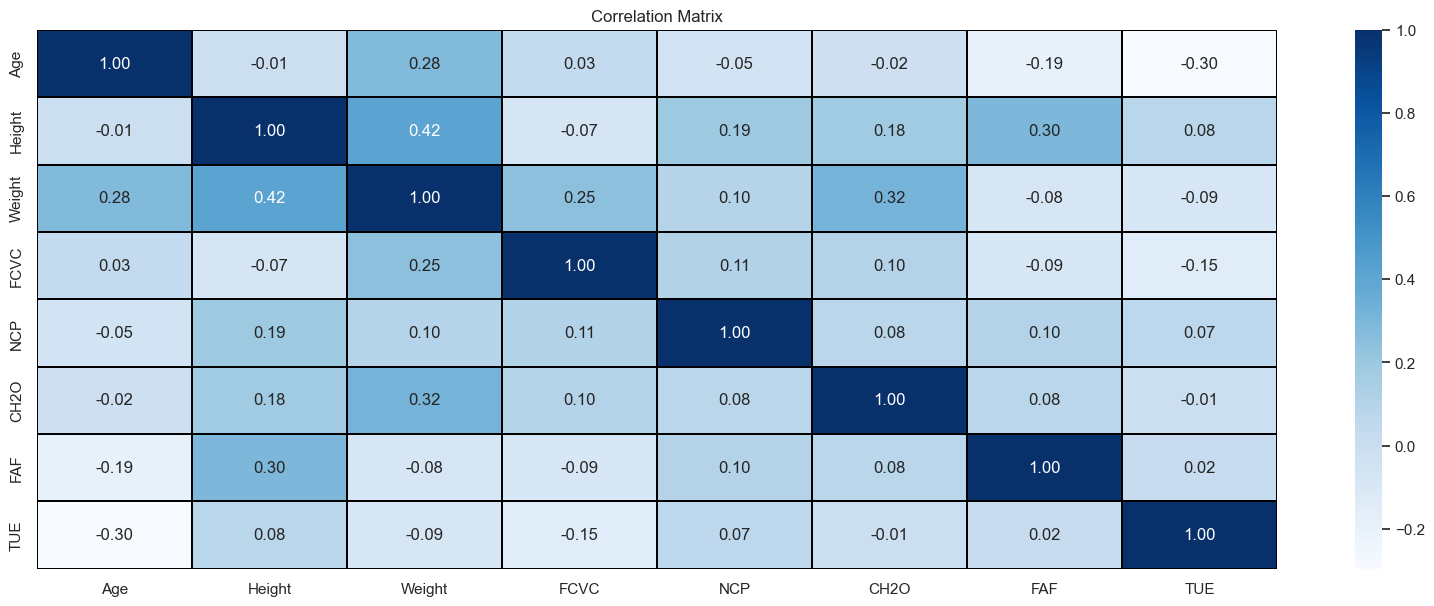

In [48]:
plt.figure(figsize=(20,7))
sbn.heatmap(data=df_train.corr(), annot=True, fmt=".2f",cmap='Blues',linewidths = 0.25,linecolor = 'black');
# sbn.heatmap(confusion_matrix(y_test, randomForestPred), annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
plt.title('Correlation Matrix')
plt.show()

In [8]:
## VERIFICA OS OUTLIERS DO  MODELO TRAIN

# for i in df_train.columns:
#     plt.subplot(i)
#     sbn.boxplot(df_train[i])
#     plt.title(i)
#     plt.show()

In [7]:
## VERIFICA OS OUTLIERS DO  MODELO TRAIN

# for i in test.columns:
#     sbn.boxplot(test[i])
#     plt.title(i)
#     plt.show()

### 2. Pre-Processing and Feature Engineer 

The dataset seems similar to "Obesity based on eating habits & physical cond" (https://www.kaggle.com/datasets/ankurbajaj9/obesity-levels) which has been derived from:

Palechor, Fabio Mendoza, and Alexis de la Hoz Manotas. "Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico." Data in brief 25 (2019): 104344. (https://www.sciencedirect.com/science/article/pii/S2352340919306985)

The research paper introduces a dataset designed for estimating obesity levels in individuals across Mexico, Peru, and Colombia. The estimation relies on factors such as eating habits and physical condition. The dataset encompasses 17 attributes and 2111 records, each labeled with the class variable NObesity (Obesity Level). This variable facilitates the classification of data into categories including Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II, and Obesity Type III.

Of the total data, 77% was synthetically generated using the Weka tool and the SMOTE filter, while the remaining 23% was directly collected from users through a web platform. The dataset serves as a valuable resource for developing intelligent computational tools capable of identifying an individual's obesity level. Additionally, it can be utilized for constructing recommender systems aimed at monitoring and addressing obesity levels.

In particular we can deduct that:

- 'Gender', 'Age', 'Height', 'Weight' are physical attributes
- 'family_history_with_overweight' points out to familiarity with obesity
- FAVC = Frequent consumption of high caloric food
- FCVC = Frequency of consumption of vegetables
- NCP = Number of main meals
- CAEC = Consumption of food between meals
- SMOKE = tobacco usage
- CH20 = Consumption of water daily
- SCC = Calories consumption monitoring
- FAF = Physical activity frequency
- TUE = Time using technology devices
- CALC = Consumption of alcohol
- MTRANS = Transportation used

The target is estracted from the train

In [6]:
from sklearn.preprocessing import LabelEncoder,PowerTransformer

In [7]:
columns=['Gender','family_history_with_overweight','FAVC','SMOKE','SCC']
train =pd.get_dummies(df_train,columns=columns,drop_first=True,dtype=int)
test =pd.get_dummies(df_test,columns=columns,drop_first=True,dtype=int)


le=LabelEncoder()
a=['CAEC','CALC','MTRANS']
for i in a:
    train[i]=le.fit_transform(train[i])
    test[i]=le.fit_transform(test[i])

train['NObeyesdad']=le.fit_transform(train['NObeyesdad'])

In [8]:
pt = PowerTransformer(method='yeo-johnson')
train_features = train.drop('NObeyesdad', axis=1)
train_features_scaled = pt.fit_transform(train_features)

train_scaled = pd.DataFrame(train_features_scaled, columns=train_features.columns)
train_scaled['NObeyesdad'] = train['NObeyesdad']

In [8]:
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
    return data

train_scaled = remove_outliers(train_scaled)


q1 = list(df[numerical_features].describe().T['25%'])
q3 = list(df[numerical_features].describe().T['75%'])
iqr = [q3[i] - q1[i] for i in range(len(numerical_features))]
upper_limit = [q3[i] + (1.5 * iqr[i]) for i in range(len(numerical_features))]
lower_limit = [q1[i] - (1.5 * iqr[i]) for i in range(len(numerical_features))]

index_1 = list(set([i for f in range(len(numerical_features)) for i in range(len(df)) 
         if (df.loc[i, numerical_features[f]] > upper_limit[f]) or (df.loc[i, numerical_features[f]] < lower_limit[f])]))

In [ ]:
q1 = list(df[numerical_features].describe().T['25%'])
q3 = list(df[numerical_features].describe().T['75%'])
iqr = [q3[i] - q1[i] for i in range(len(numerical_features))]
upper_limit = [q3[i] + (1.5 * iqr[i]) for i in range(len(numerical_features))]
lower_limit = [q1[i] - (1.5 * iqr[i]) for i in range(len(numerical_features))]

index_1 = list(set([i for f in range(len(numerical_features)) for i in range(len(df)) 
         if (df.loc[i, numerical_features[f]] > upper_limit[f]) or (df.loc[i, numerical_features[f]] < lower_limit[f])]))

In [ ]:
# Z_SCORE METHOD
# Z-Score, ou pontuação padrão, é uma maneira de descrever um ponto de dados em termos de sua relação com a média e o desvio padrão de um grupo de pontos. 
# Obter um Z-Score é simplesmente mapear os dados em uma distribuição cuja média é definida como 0 e cujo desvio padrão é definido como 1.
# O objetivo de obter Z-scores é remover os efeitos da localização e da escala dos dados, permitindo que diferentes conjuntos de dados sejam comparados diretamente. 
# A intuição por trás do método Z-Score de detecção de outliers é que, uma vez que tenhamos centralizado e redimensionado os dados, qualquer valor que esteja muito longe de zero (o limite é geralmente um Z-Score de 3 ou -3) deve ser considerado um outlier.
# Pressupondo que os dados sejam distribuídos normalmente (curva em forma de sino), a Média + 3*SD (Desvio Padrão) capturará 99,7% das observações. 
# Estatisticamente, qualquer valor que esteja fora dessa faixa será considerado uma anomalia.

mean = list(df[numerical_features].describe().T['mean'])
std = list(df[numerical_features].describe().T['std'])
z_score = [[(df.loc[i, numerical_features[f]] - mean[f]) / std[f] for i in range(len(df))] 
           for f in range(len(numerical_features))]

index_2 = list(set([j for i in z_score for j in range(len(i)) if (i[j] > 3) or (i[j] < -3)]))

In [ ]:
print('Number of Outliers from IQR Method : ',len(index_1))
print('Number of Outliers from Z-Score Method : ',len(index_2))

In [ ]:
# DATA BALACING

import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


# IQR Method :
# Lowest Count : 1282 --- Highest Count : 4044
d1 = {0:3500, 1:3500, 2:3500, 3:3500, 4:3500, 5:3500, 6:3500}; d2 = {0:1200, 1:1200, 2:1200, 3:1200, 4:1200, 5:1200, 6:1200}
over = SMOTE(sampling_strategy = d1); under = RandomUnderSampler(sampling_strategy = d2)
f1 = df1.loc[:,: 'MTRANS']; t1 = df1.loc[:,'NObeyesdad']

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
print(Counter(t1))

# Z-Score Method :
# Lowest Count : 2397 --- Highest Count : 4046
d1 = {0:3500, 1:3500, 2:3500, 3:3500, 4:3500, 5:3500, 6:3500}; d2 = {0:2000, 1:2000, 2:2000, 3:2000, 4:2000, 5:2000, 6:2000}
over = SMOTE(sampling_strategy = d1); under = RandomUnderSampler(sampling_strategy = d2)
f1 = df2.loc[:,: 'MTRANS']; t1 = df2.loc[:,'NObeyesdad']

steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)


In [ ]:
#DATA SCALLING 

from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

for i in tqdm(numerical_features + categorical_features):
    df1[i] = mms.fit_transform(df1[[i]])
    test[i] = mms.transform(test[[i]])
    
for i in tqdm(numerical_features + categorical_features):
    df2[i] = mms.fit_transform(df2[[i]])
    test[i] = mms.transform(test[[i]])

test.head()

In [ ]:
df1 = df.copy(deep = True)
df2 = df.copy(deep = True)

# IQR Method :
df1.drop(index = index_1,inplace = True) 
# Z-Score Method :
df2.drop(index = index_2,inplace = True)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif,chi2

In [ ]:
eatures_1 = df.loc[:,categorical_features]; target_1 = df['NObeyesdad']
features_2 = df1.loc[:,categorical_features]; target_2 = df1['NObeyesdad']
features_3 = df2.loc[:,categorical_features]; target_3 = df2['NObeyesdad']

best_features = SelectKBest(score_func = mutual_info_classif,k = 'all'); 

fit_1 = best_features.fit(features_1,target_1)
featureScores_1 = pd.DataFrame(data = fit_1.scores_,index = list(features_1.columns),columns = ['Mutual Information Score'])

fit_2 = best_features.fit(features_2,target_2)
featureScores_2 = pd.DataFrame(data = fit_2.scores_,index = list(features_2.columns),columns = ['Mutual Information Score'])

fit_3 = best_features.fit(features_3,target_3)
featureScores_3 = pd.DataFrame(data = fit_3.scores_,index = list(features_3.columns),columns = ['Mutual Information Score'])

featureScores = [featureScores_1, featureScores_2, featureScores_3]; featureScores_labels = ['Original Dataframe (df)', 'IQR Method (df1)', 'Z-Score Method (df2)']
fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,6))
for i in range(len(featureScores)):
    plt.subplot(1,3,i+1)
    sbn.heatmap(featureScores[i].sort_values(ascending = False,by = 'Mutual Information Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
    plt.title(featureScores_labels[i]);

fig.tight_layout(pad = 0)


In [ ]:
from sklearn.feature_selection import f_classif


features_1 = df.loc[:,categorical_features]; target_1 = df['NObeyesdad']
features_2 = df1.loc[:,categorical_features]; target_2 = df1['NObeyesdad']
features_3 = df2.loc[:,categorical_features]; target_3 = df2['NObeyesdad']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit_1 = best_features.fit(features_1,target_1)
featureScores_1 = pd.DataFrame(data = fit_1.scores_,index = list(features_1.columns),columns = ['Chi Squared Score'])

fit_2 = best_features.fit(features_2,target_2)
featureScores_2 = pd.DataFrame(data = fit_2.scores_,index = list(features_2.columns),columns = ['Chi Squared Score'])

fit_3 = best_features.fit(features_3,target_3)
featureScores_3 = pd.DataFrame(data = fit_3.scores_,index = list(features_3.columns),columns = ['Chi Squared Score'])

featureScores = [featureScores_1, featureScores_2, featureScores_3]; featureScores_labels = ['Original Dataframe (df)', 'IQR Method (df1)', 'Z-Score Method (df2)']

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,6))
for i in range(len(featureScores)):
    plt.subplot(1,3,i+1)
    sns.heatmap(featureScores[i].sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
    plt.title(featureScores_labels[i]);

fig.tight_layout(pad = 0)

In [ ]:
from sklearn.feature_selection import f_classif

features_1 = df.loc[:,numerical_features]; target_1 = df['NObeyesdad']
features_2 = df1.loc[:,numerical_features]; target_2 = df1['NObeyesdad']
features_3 = df2.loc[:,numerical_features]; target_3 = df2['NObeyesdad']

best_features = SelectKBest(score_func = f_classif,k = 'all')

fit_1 = best_features.fit(features_1,target_1)
featureScores_1 = pd.DataFrame(data = fit_1.scores_,index = list(features_1.columns),columns = ['ANOVA Score'])

fit_2 = best_features.fit(features_2,target_2)
featureScores_2 = pd.DataFrame(data = fit_2.scores_,index = list(features_2.columns),columns = ['ANOVA Score'])

fit_3 = best_features.fit(features_3,target_3)
featureScores_3 = pd.DataFrame(data = fit_3.scores_,index = list(features_3.columns),columns = ['ANOVA Score'])

featureScores = [featureScores_1, featureScores_2, featureScores_3]; featureScores_labels = ['Original Dataframe (df)', 'IQR Method (df1)', 'Z-Score Method (df2)']

fig,ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,6))
for i in range(len(featureScores)):
    plt.subplot(1,3,i+1)
    sns.heatmap(featureScores[i].sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
    plt.title(featureScores_labels[i]);

fig.tight_layout(pad = 0)

In [ ]:
features = df2[['Age', 'Height', 'Weight', 'FCVC', 'CH2O', 'Gender', 'family_history_with_overweight', 'CAEC', 'SCC', 'CALC']].values
target = df2['NObeyesdad'].values
t1 = test[['Age', 'Height', 'Weight', 'FCVC', 'CH2O', 'Gender', 'family_history_with_overweight', 'CAEC', 'SCC', 'CALC']]

In [5]:
# FEATURE ENGINNER 

def feature_engineering(data):
    # BMI
    data['BMI'] = data['Weight'] / (data['Height'] ** 2)
    # Activity
    data['Activity'] = data['FAF'] * data['TUE']
    # Age group
    data['Age_Group'] = pd.cut(data['Age'], bins=[0, 18, 30, 45, float('inf')], labels=[0, 1, 2, 3])
    data['Age_Group'] = data['Age_Group'].dropna().astype(int)
    # Height group
    data['Height_Group'] = pd.cut(data['Height'], bins=[0, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, float('inf')], labels=[0, 1, 2, 3, 4, 5, 6])
    data['Height_Group'] = data['Height_Group'].dropna().astype(int)
    
    data['Risk factor'] = (data['BMI'] + data['Age_Group']) * (data["family_history_with_overweight_yes"] + data["SMOKE_yes"])
    # taken from: https://www.kaggle.com/code/ravi20076/playgrounds4e02-extraftre-models
    data["BMIbyNCP"] = np.log1p(data["BMI"]) - np.log1p(data["NCP"])
    data["BMIFAF"] = (data["BMI"] * data["FAF"])/ 25.0
    data["FAFmTUE"] = data["FAF"] - data["TUE"]
    data["FCVCpNCP"] = data['FCVC'] * data['NCP']
    data['TechUse'] = np.log1p(data['TUE']) - np.log1p(data['Age'])
    # data['Healthy_Nutrition_Habits'] = data['FCVC'] / ( 2 * data['FAVC_no'] - 1)
    return data

In [12]:
train_scaled = feature_engineering(train_scaled)

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [14]:
print(train_scaled.isnull().sum())

id                                        0
Age                                       0
Height                                    0
Weight                                    0
FCVC                                      0
NCP                                       0
CAEC                                      0
CH2O                                      0
FAF                                       0
TUE                                       0
CALC                                      0
MTRANS                                    0
Gender_Male                               0
family_history_with_overweight_yes        0
FAVC_yes                                  0
SMOKE_yes                                 0
SCC_yes                                   0
NObeyesdad                                0
BMI                                       0
Activity                                  0
Age_Group                             10104
Height_Group                           9460
Risk factor                     

In [15]:
train_scaled.fillna(train_scaled["Age_Group"].mode()[0], inplace=True)
train_scaled.fillna(train_scaled["Height_Group"].mode()[0], inplace=True)
train_scaled.fillna(train_scaled["BMIbyNCP"].mode()[0], inplace=True)
train_scaled.fillna(train_scaled["TechUse"].mode()[0], inplace=True)
train_scaled.fillna(train_scaled["Risk factor"].mode()[0], inplace=True)

In [ ]:
# dataset_x = df_Treino.copy()
# dataset_y = dataset_x.pop("Status")
# discrete_features = dataset_x.dtypes == int

# def make_mi_scores(dataset_x, dataset_y, discrete_features):
#     mi_scores = mutual_info_regression(dataset_x, dataset_y, discrete_features=discrete_features)
#     mi_scores = pd.Series(mi_scores, name="MI Scores", index=dataset_x.columns)
#     mi_scores = mi_scores.sort_values(ascending=False)
#     return mi_scores

# mi_scores = make_mi_scores(dataset_x, dataset_y, discrete_features)
# mi_scores[::2]*100  # show a few features with their MI scores

# # PLOTANDO AS PRINCIPAIS FEATURES 
# def plot_mi_scores(scores):
#     scores = scores.sort_values(ascending=True)
#     width = np.arange(len(scores))
#     ticks = list(scores.index)
#     plt.barh(width, scores)
#     plt.yticks(width, ticks)
#     plt.title("Mutual Information Scores")


# plt.figure(dpi=100, figsize=(10, 15))
# plot_mi_scores(mi_scores)

### 3. modeling

In [18]:
from sklearn.model_selection import train_test_split

x = train_scaled.drop(['NObeyesdad'], axis=1)
y = train_scaled['NObeyesdad']

# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print(x_train.shape, 
      x_test.shape, 
      y_train.shape,
      y_test.shape)

(16606, 27) (4152, 27) (16606,) (4152,)


Initially, I want to test both classification models (decision tree, random decision tree, logistic regression) and prediction models (SVM, Naive Bayes, linear regression) to understand their efficiency within the dataset

In [19]:
from sklearn.model_selection import cross_validate, cross_val_predict, GridSearchCV, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, precision_recall_curve, roc_auc_score, plot_roc_curve, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from mlens.ensemble import SuperLearner

In [20]:
## MODEL RANDOM FOREST 
## TESTAR UM MODELO DE CLASSIFICAÇÃO PARA ENTENDER O COMPORTAMENTO

model_randomForest = RandomForestClassifier(random_state=42, 
                            n_estimators=100, 
                            max_depth=20, 
                            min_samples_split=2, 
                            min_samples_leaf=1,
                            criterion='gini', 
                            bootstrap=True,
                            class_weight=None, 
                            ccp_alpha=0.0, max_samples=None)


#Fit the model
model_randomForest.fit(x_train,y_train)

# predict
randomForestPred = model_randomForest.predict(x_test)

#Accuracy
acc_randomForest = round(model_randomForest.score(x_test, y_test)*100,2)

# #Precisão do Modelo
# RandomForestPrecision = round(precision_score(y_test, randomForestPred)*100,2)

# # F1 Score
# randomForest_F1_score = round(f1_score(y_test, randomForestPred)*100,2)

# #recall 
# randomForest_Recall = round(recall_score(y_test, randomForestPred)*100,2)

In [21]:
# XGBOOST MODEL 

model_xgb = XGBClassifier(learning_rate = 0.1,max_depth = 3,n_estimators = 1000)

model_xgb.fit(x_train, y_train)

XGB_pred = model_xgb.predict(x_test)

acc_xgb = round(accuracy_score(y_test, XGB_pred)*100,2)

[13:49:25] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "device", "min_samples_leaf", "min_samples_split" } are not used.



In [24]:
# Arvore de decisão  

model_decisiontree = DecisionTreeClassifier()

# training fit 
model_decisiontree.fit(x_train,y_train)

# predict
decisionTreePred = model_decisiontree.predict(x_test)

# acuracy
acc_decisiontree = round(model_decisiontree.score(x_test, y_test)*100,2)


In [ ]:
# Super Learner Model
def get_super_learner(X):
    
    ensemble = SuperLearner(scorer=accuracy_score, folds=10, shuffle=True, sample_size=len(X))
    
    # add base models
    ensemble.add([LGBMClassifier(learning_rate= 0.1,max_depth = 3,n_estimators = 1000),
                 XGBClassifier(learning_rate = 0.1,max_depth = 3,n_estimators = 1000)])
    
    # add the meta model
    ensemble.add_meta(XGBClassifier(learning_rate = 0.1,max_depth = 3,n_estimators = 1000)) 
    return ensemble

ensemble = get_super_learner(x_train)
ensemble.fit(x_train, y_train)

predictions = ensemble.predict(x_test)
print("Accuracy : "'{0:.2%}'.format(accuracy_score(y_test,predictions)))

In [29]:
print('decision tree:', acc_decisiontree,"XGBoost:", acc_xgb, "Random Forest:", acc_randomForest)

decision tree: 84.1 XGBoost: 90.13 Random Forest: 89.79


Classification Report

In [ ]:
def model_evaluation(classifier,x_train,y_train,x_test,y_test):
    
    # Fit and Predict
    classifier.fit(x_train,y_train); prediction = classifier.predict(x_test)
    
    # Cross-Validation 
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 1,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'accuracy').mean()))

    # Confusion Matrix
    cm = confusion_matrix(y_test,prediction, labels = classifier.classes_)
    counts = [value for value in cm.flatten()]; percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(counts,percentages)]; labels = np.asarray(labels).reshape(7,7)

    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classifier.classes_)
    disp.plot();

    # Classification Report
    print(classification_report(y_test,prediction))

In [30]:
print('***** Random Forest ******\n')

print(classification_report(y_test, randomForestPred))


***** Random Forest ******

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       524
           1       0.86      0.89      0.87       626
           2       0.87      0.87      0.87       543
           3       0.97      0.97      0.97       657
           4       1.00      1.00      1.00       804
           5       0.77      0.77      0.77       484
           6       0.80      0.79      0.79       514

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152



In [31]:
print('***** XGBOOST *****\n')

print(classification_report(y_test,XGB_pred))

***** XGBOOST *****

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       524
           1       0.87      0.89      0.88       626
           2       0.90      0.87      0.88       543
           3       0.98      0.97      0.97       657
           4       0.99      1.00      1.00       804
           5       0.76      0.76      0.76       484
           6       0.79      0.80      0.79       514

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152



In [32]:
print('***** Decision Tree *****\n')

print(classification_report(y_test,decisionTreePred))

***** Decision Tree *****

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       524
           1       0.77      0.79      0.78       626
           2       0.81      0.83      0.82       543
           3       0.96      0.96      0.96       657
           4       0.99      1.00      1.00       804
           5       0.64      0.66      0.65       484
           6       0.71      0.68      0.69       514

    accuracy                           0.84      4152
   macro avg       0.83      0.82      0.82      4152
weighted avg       0.84      0.84      0.84      4152



In [37]:
scores = cross_val_score(model_randomForest, x, y, cv=10, scoring='accuracy')
scores.sort()
accuracy = scores.mean()
print(scores)
print(accuracy)

[0.87813102 0.89017341 0.8939759  0.89691715 0.89836224 0.89879518
 0.89932563 0.90077071 0.90366089 0.90992293]
0.8970035053508834


In [ ]:
score = roc_auc_score(y_true=y, y_score=cv_preds[:,1])
print(f"roc-auc score: {score:0.3f}")

In [42]:
# from skopt import BayesSearchCV

# GRID SEARCH PARA O RANDOM FOREST 
grid_space={'max_depth': [2,3,4,5],
            'min_samples_split': [50,100,200,300,500]}

gridRandomForest = GridSearchCV(model_randomForest,param_grid=grid_space,cv=3,scoring='accuracy')

gridRandomForest.fit(x_train, y_train)

print('Best hyperparameters are: '+str(gridRandomForest.best_params_))
print('Best score is: '+str(gridRandomForest.best_score_))

Best hyperparameters are: {'max_depth': 5, 'min_samples_split': 100}
Best score is: 0.8241600243154004


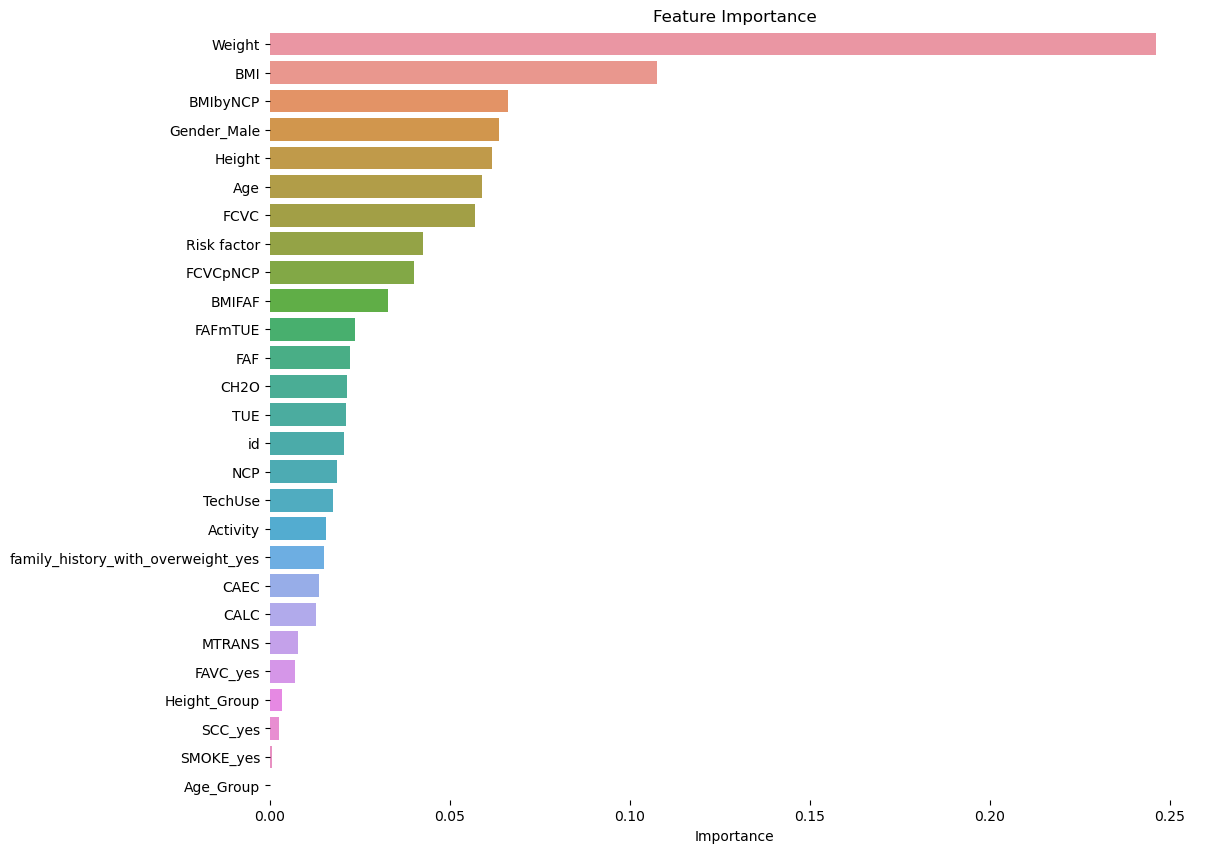

In [35]:
# feature importances
feature_importance = model_randomForest.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sbn.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sbn.despine(left=True, bottom=True)
plt.show()

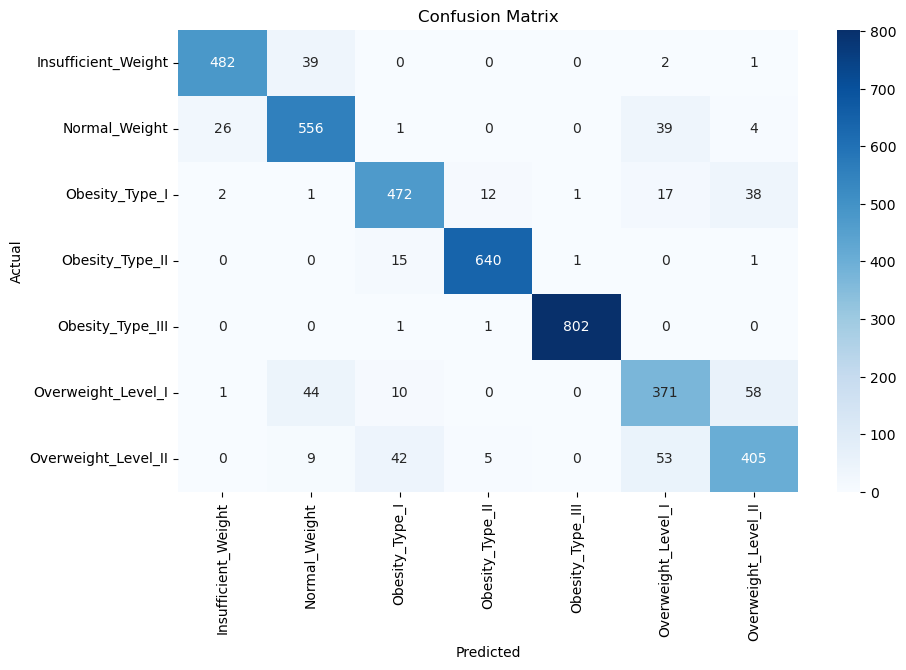

In [44]:
plt.figure(figsize=(10, 6))
sbn.heatmap(confusion_matrix(y_test, randomForestPred), annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import shap


for k, target_label in enumerate(target_encoder.classes_):
    print(f"VIOLIN PLOT REPRESENTING <{target_label}>")
    shap.summary_plot(shap_values[:,k, :-1], train.values,
                      plot_type="violin",
                      feature_names=feature_names, show=False)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.show()
    print()

### 4. Submission 

In [ ]:
xgb.fit(features,target)
lgbm.fit(features,target)
cbt.fit(features,target)
stack.fit(features,target)
vot.fit(features,target)
ensemble.fit(features,target)

p1 = xgb.predict(t1.values)
p2 = le.inverse_transform(p1.astype(int))

submission = pd.DataFrame({'id': sample_submission.id, 'NObeyesdad': p2})
submission.to_csv('submission.csv', index=False)

In [45]:
submission = pd.DataFrame({'id': test['id'], 'NObeyesdad': model_randomForest.predict(test)})

submission['NObeyesdad'] = le.inverse_transform(submission['NObeyesdad'])

submission.to_csv('submission_random_forest2.csv', index=False)

In [ ]:
# Salvando o modelo
import pickle
pickle.dump(model, open('model_xgb.pickle', 'wb'))